In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
# 파일 경로 설정 및 데이터 불러오기 (Model 1)
file_path = 'C:/Users/Lenovo/Downloads/model1.csv'
data1 = pd.read_csv(file_path)

data1

,"last_name, first_name",player_id,year,pa,k_percent,bb_percent,isolated_power,xba,woba,xiso,...,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,linedrives_percent,hp_to_1b,sprint_speed
0,"Cabrera, Miguel",408234,2021,526,22.4,7.6,0.130,0.234,0.305,0.186,...,91.4,10.0,32.8,8.3,49.0,101.953387,95.613068,21.5,5.01,24.0
1,"Molina, Yadier",425877,2021,473,16.7,5.1,0.118,0.255,0.290,0.151,...,88.0,15.3,34.1,5.2,31.6,97.653775,92.936144,21.7,4.92,22.8
2,"Cruz Jr., Nelson",443558,2021,584,21.6,8.7,0.232,0.264,0.346,0.248,...,92.9,11.8,31.8,13.6,52.5,105.497885,97.364589,22.0,4.69,26.0
3,"Peralta, David",444482,2021,538,17.1,8.6,0.143,0.243,0.314,0.103,...,89.3,5.3,27.2,5.0,41.8,101.204663,94.748490,23.2,4.38,27.6
4,"Escobar, Alcides",444876,2021,349,16.0,4.9,0.116,0.271,0.325,0.091,...,81.7,11.1,36.3,3.0,21.0,93.737836,91.096948,28.8,4.36,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,"Langford, Wyatt",694671,2024,557,20.6,9.2,0.162,0.260,0.321,0.174,...,89.6,16.6,31.3,9.3,43.4,101.211099,94.807366,22.0,4.25,29.8
1114,"Wood, James",695578,2024,336,28.9,11.6,0.163,0.271,0.342,0.173,...,92.8,2.4,31.3,10.6,52.0,104.677013,97.028449,25.8,4.18,28.7
1115,"Young, Jacob",696285,2024,521,19.6,5.8,0.075,0.260,0.290,0.066,...,85.8,4.0,28.1,1.6,28.9,96.872142,92.486925,23.1,4.20,29.7
1116,"Merrill, Jackson",701538,2024,593,17.0,4.9,0.208,0.308,0.352,0.240,...,90.4,14.6,39.6,11.3,43.9,100.811785,94.735707,26.0,4.25,28.5


In [2]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_name, first_name  1118 non-null   object 
 1   player_id              1118 non-null   int64  
 2   year                   1118 non-null   int64  
 3   pa                     1118 non-null   int64  
 4   k_percent              1118 non-null   float64
 5   bb_percent             1118 non-null   float64
 6   isolated_power         1118 non-null   float64
 7   xba                    1118 non-null   float64
 8   woba                   1118 non-null   float64
 9   xiso                   1118 non-null   float64
 10  wobacon                1118 non-null   float64
 11  xwobacon               1118 non-null   float64
 12  xbacon                 1118 non-null   float64
 13  exit_velocity_avg      1118 non-null   float64
 14  launch_angle_avg       1118 non-null   float64
 15  swee

In [3]:
data1.describe()

,player_id,year,pa,k_percent,bb_percent,isolated_power,xba,woba,xiso,wobacon,...,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,linedrives_percent,hp_to_1b,sprint_speed
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,...,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,619713.499106,2022.539356,493.483005,21.924597,8.501252,0.166874,0.249347,0.320862,0.165754,0.375619,...,89.072987,13.030501,33.982379,8.363059,39.960197,99.957204,94.240153,23.916190,4.467451,27.292934
std,60725.961371,1.108996,119.395370,5.845248,2.917265,0.054138,0.025180,0.035436,0.055265,0.054858,...,2.170570,4.607657,3.679582,4.157121,7.391427,2.411267,1.407235,2.915918,0.196766,1.347492
min,405395.000000,2021.000000,300.000000,4.300000,1.700000,0.046000,0.149000,0.217000,0.048000,0.226000,...,81.700000,-4.400000,19.900000,0.000000,14.100000,92.098593,90.250995,14.300000,4.050000,22.100000
25%,592663.000000,2022.000000,386.250000,17.725000,6.400000,0.127000,0.233000,0.298000,0.127250,0.338000,...,87.700000,10.000000,31.500000,5.200000,35.400000,98.371044,93.285052,21.825000,4.330000,26.400000
50%,642134.500000,2023.000000,490.500000,21.600000,8.300000,0.162000,0.249000,0.319500,0.161000,0.370000,...,89.000000,13.150000,34.000000,7.900000,40.150000,99.887999,94.154369,23.900000,4.430000,27.400000
75%,666139.000000,2024.000000,595.750000,25.800000,10.300000,0.201000,0.265000,0.343000,0.200000,0.410000,...,90.400000,16.100000,36.375000,10.975000,44.900000,101.441696,95.073982,25.900000,4.600000,28.300000
max,807799.000000,2024.000000,753.000000,42.800000,23.200000,0.379000,0.357000,0.476000,0.427000,0.617000,...,97.600000,28.900000,46.700000,27.500000,64.200000,108.657831,99.748784,33.300000,5.260000,30.600000


In [4]:
# 쓸모없는 열 제거
data1 = data1.drop(columns=['last_name, first_name', 'year', 'pa'], errors='ignore')

# 결측치 제거
data1 = data1.dropna()

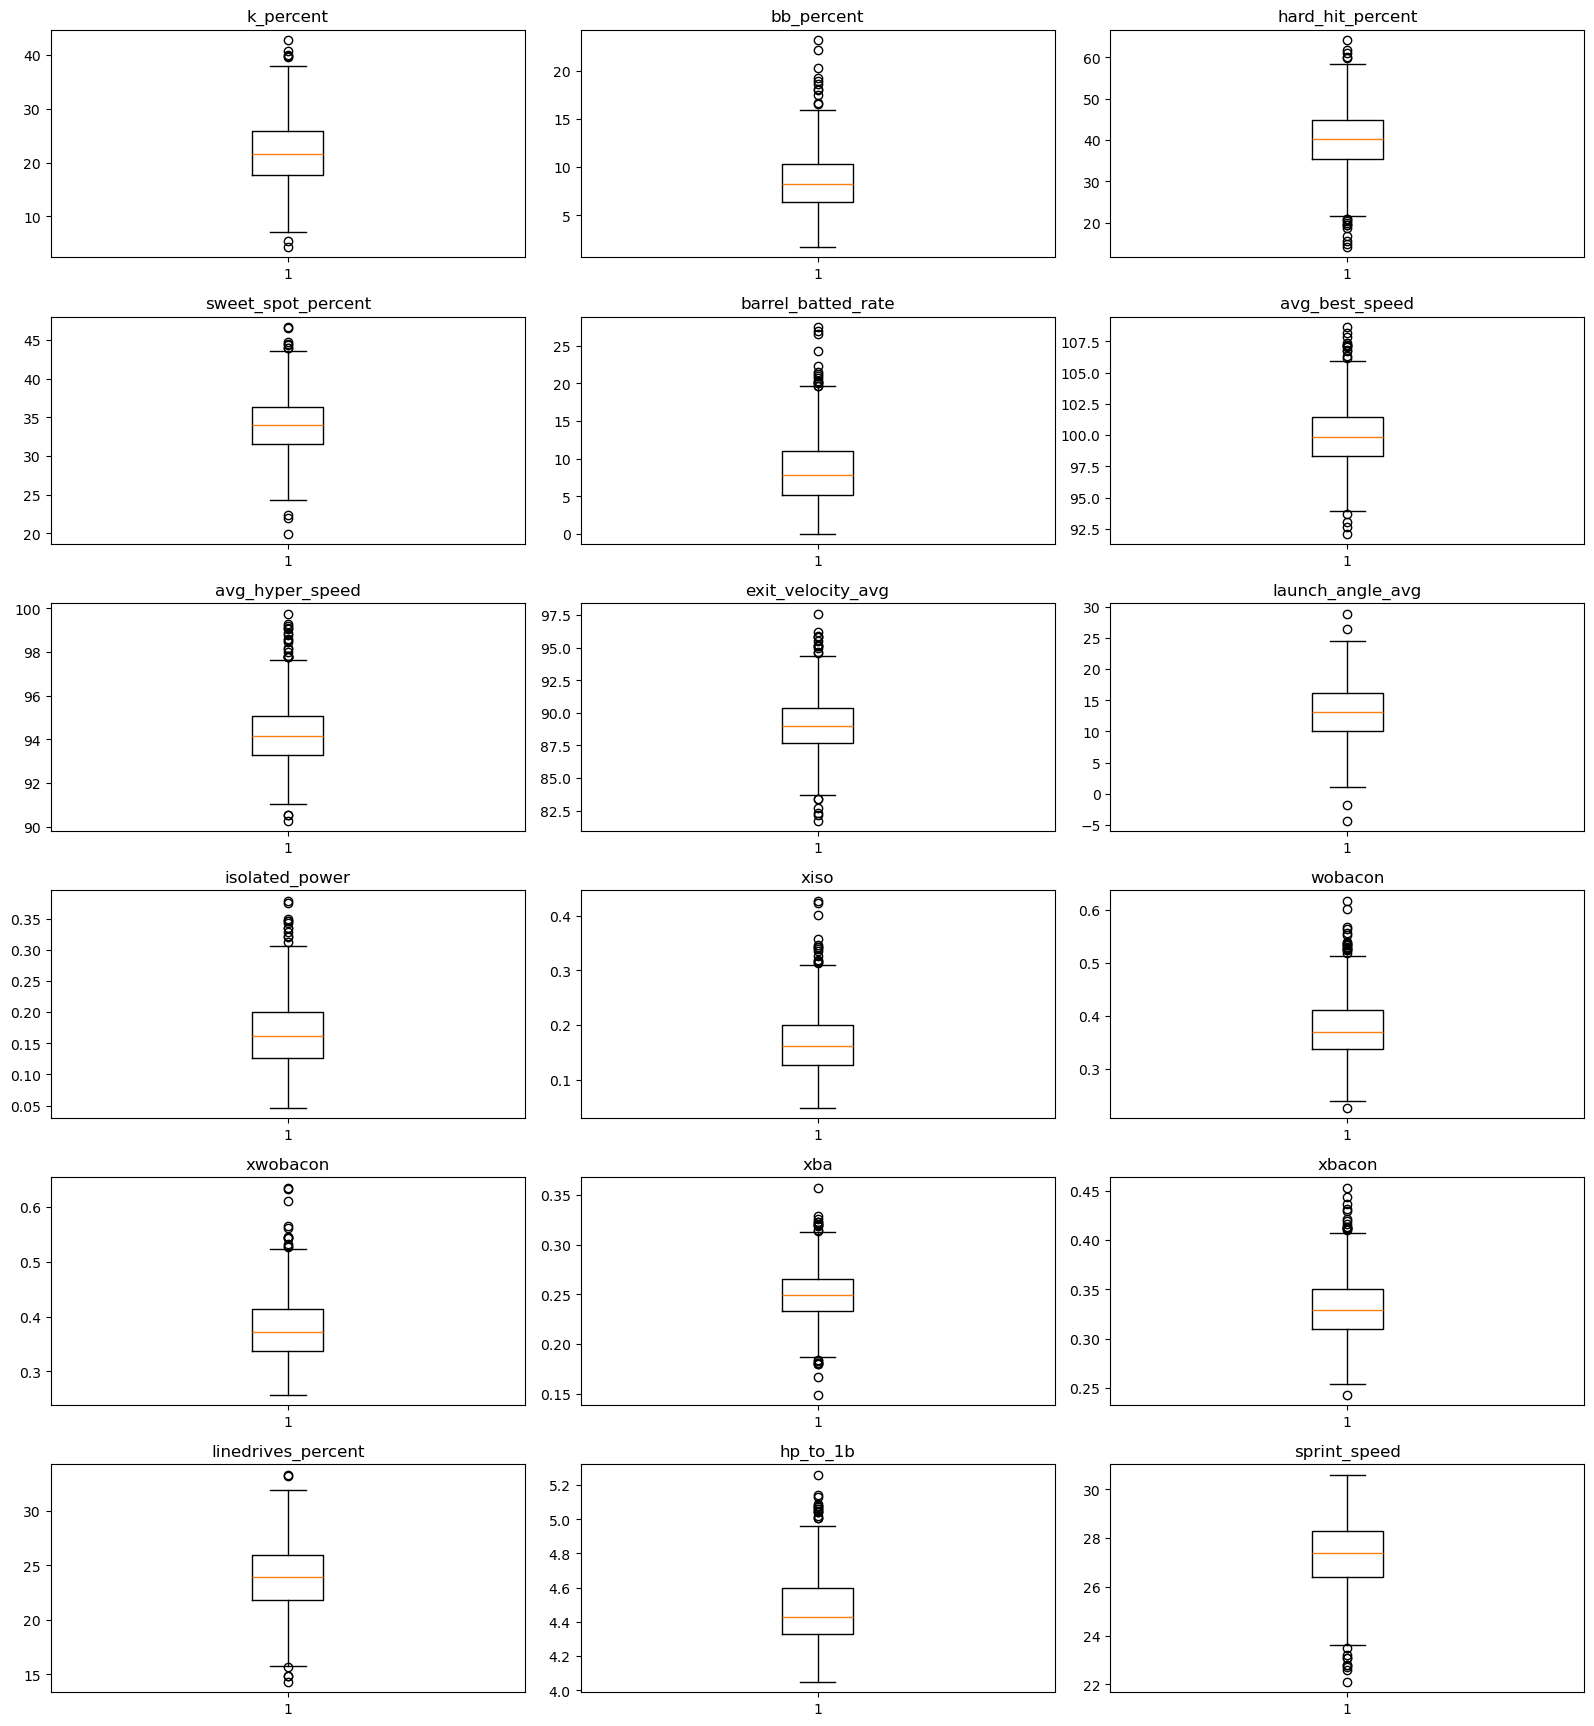

In [5]:
# 박스플롯을 이용해 이상치 확인 ### 이상치는 그냥 보존하기로 결정
### 이상치 처리 안하고 스케일링했을때 값이 너무 이상하면 조정하던지 RandomForest 같은 모델 쓸 예정임.
numeric_columns = [
    "k_percent", "bb_percent", "hard_hit_percent", 
    "sweet_spot_percent", "barrel_batted_rate", 
    "avg_best_speed", "avg_hyper_speed", "exit_velocity_avg", 
    "launch_angle_avg", "isolated_power", "xiso", 
    "wobacon", "xwobacon", "xba", 
    "xbacon", "linedrives_percent", "hp_to_1b", "sprint_speed"]
plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    plt.boxplot(data1[col].dropna())
    plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# 데이터 준비
# 종속변수(woba)와 독립변수 분리
X = data1.drop(columns=['woba'])  # 독립변수
y = data1['woba']                 # 종속변수

# 선형 회귀 모델을 사용한 변수 중요도 계산
linear_model = LinearRegression()
linear_model.fit(X, y)

# 절대값을 기준으로 변수 중요도 추출 및 정렬
linear_coefficients = pd.Series(linear_model.coef_, index=X.columns)
linear_coefficients = linear_coefficients.abs().sort_values(ascending=False)

# 결과 출력
print("Linear Regression Coefficients (Absolute Importance):\n", linear_coefficients)

Linear Regression Coefficients (Absolute Importance):
 wobacon               6.671750e-01
xwobacon              6.108227e-01
xbacon                3.574246e-01
xiso                  2.783663e-01
xba                   2.243131e-01
isolated_power        5.129438e-03
avg_hyper_speed       4.569955e-03
bb_percent            3.430271e-03
hp_to_1b              2.716898e-03
avg_best_speed        2.499123e-03
k_percent             2.192898e-03
exit_velocity_avg     7.106597e-04
sprint_speed          5.539036e-04
hard_hit_percent      3.098629e-04
barrel_batted_rate    1.957319e-04
linedrives_percent    1.924516e-04
sweet_spot_percent    1.820131e-04
launch_angle_avg      4.728752e-05
player_id             2.076797e-09
dtype: float64


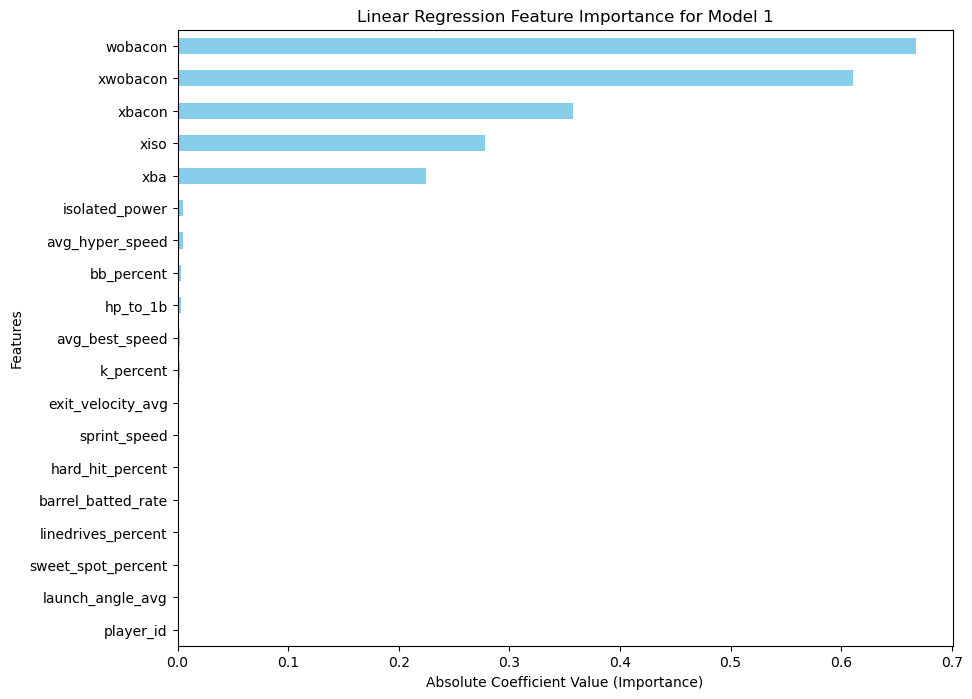

In [7]:
# 선형 회귀 변수 중요도를 시각화
def plot_linear_coefficients(coefficients, title="Linear Regression Feature Importance"):
    plt.figure(figsize=(10, 8))
    coefficients.plot(kind='barh', color='skyblue')
    plt.title(title)
    plt.xlabel('Absolute Coefficient Value (Importance)')
    plt.ylabel('Features')
    plt.gca().invert_yaxis()
    plt.show()

plot_linear_coefficients(linear_coefficients, title="Linear Regression Feature Importance for Model 1")

In [8]:
# 상관관계 분석
correlation_matrix1 = data1.corr()

# 상관관계가 0.8이상 변수 쌍 확인
high_corr_vars1 = correlation_matrix1.columns[(correlation_matrix1.abs() > 0.8).any()].tolist()
high_corr_matrix1 = correlation_matrix1.loc[high_corr_vars1, high_corr_vars1]

high_corr_matrix1

,player_id,k_percent,bb_percent,isolated_power,xba,woba,xiso,wobacon,xwobacon,xbacon,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,linedrives_percent,hp_to_1b,sprint_speed
player_id,1.000000,0.074088,-0.075332,-0.013402,0.001875,-0.026309,-0.019120,0.037754,0.028068,0.065508,-0.001601,-0.050988,0.003273,0.002816,-0.023929,-0.006086,-0.005957,0.004716,-0.375214,0.380867
k_percent,0.074088,1.000000,0.122107,0.307987,-0.546650,-0.091422,0.366793,0.481216,0.508400,0.356214,0.315886,0.240100,0.080800,0.555104,0.377559,0.410103,0.395081,-0.219379,0.022886,0.128326
bb_percent,-0.075332,0.122107,1.000000,0.362296,0.002355,0.465344,0.388933,0.289088,0.345386,0.229744,0.362725,0.224239,0.117414,0.388998,0.308236,0.300094,0.320851,-0.069429,0.127160,-0.171115
isolated_power,-0.013402,0.307987,0.362296,1.000000,0.215668,0.755057,0.893237,0.833247,0.786033,0.568303,0.642554,0.442458,0.233253,0.845054,0.651417,0.675097,0.681651,-0.132793,0.075931,-0.016485
xba,0.001875,-0.546650,0.002355,0.215668,1.000000,0.609533,0.298300,0.266715,0.351658,0.576240,0.330246,-0.277520,0.330576,0.120102,0.314012,0.290578,0.310635,0.491669,-0.072640,0.022020
woba,-0.026309,-0.091422,0.465344,0.755057,0.609533,1.000000,0.685940,0.793143,0.657593,0.636695,0.546478,0.129969,0.333362,0.571757,0.535382,0.529912,0.548462,0.160668,-0.008745,-0.007732
xiso,-0.019120,0.366793,0.388933,0.893237,0.298300,0.685940,1.000000,0.797675,0.919534,0.714672,0.774196,0.365342,0.309823,0.946862,0.786700,0.795039,0.807653,-0.085471,0.162630,-0.094905
wobacon,0.037754,0.481216,0.289088,0.833247,0.266715,0.793143,0.797675,1.000000,0.873522,0.786644,0.641564,0.212037,0.342743,0.806353,0.672854,0.692715,0.699930,0.043323,-0.027530,0.108021
xwobacon,0.028068,0.508400,0.345386,0.786033,0.351658,0.657593,0.919534,0.873522,1.000000,0.910356,0.784511,0.198517,0.388827,0.922148,0.814620,0.830513,0.841671,0.075821,0.062547,0.032619
xbacon,0.065508,0.356214,0.229744,0.568303,0.576240,0.636695,0.714672,0.786644,0.910356,1.000000,0.695097,-0.055557,0.450702,0.703407,0.727208,0.736327,0.747826,0.323541,-0.046793,0.127570


In [9]:
# 상관관계 높은 요소 찾고 MinMax랑 정규화중 뭘로 할지 정함
highly_correlated_pairs1 = correlation_matrix1[(correlation_matrix1 > 0.8) & (correlation_matrix1 != 1)].stack()
scaling_method1 = 'MinMaxScaler' if not highly_correlated_pairs1.empty else 'StandardScaler'

highly_correlated_pairs1

isolated_power      xiso                  0.893237
                    wobacon               0.833247
                    barrel_batted_rate    0.845054
xiso                isolated_power        0.893237
                    xwobacon              0.919534
                    barrel_batted_rate    0.946862
                    avg_hyper_speed       0.807653
wobacon             isolated_power        0.833247
                    xwobacon              0.873522
                    barrel_batted_rate    0.806353
xwobacon            xiso                  0.919534
                    wobacon               0.873522
                    xbacon                0.910356
                    barrel_batted_rate    0.922148
                    hard_hit_percent      0.814620
                    avg_best_speed        0.830513
                    avg_hyper_speed       0.841671
xbacon              xwobacon              0.910356
exit_velocity_avg   hard_hit_percent      0.934119
                    avg_best_sp

In [10]:
scaling_method1

'MinMaxScaler'

In [11]:
###MinMaxScaler를 이용해서 scaling하기. 비율 변수 제외하면 다 했음.
##혹시 모르니 변수 열거해두겠음.

# 모델에 사용할 데이터셋 준비
model1_data = data1.copy()

# 스케일링이 필요한 변수와 그대로 사용할 변수 리스트
scaling_needed_vars = [
    "exit_velocity_avg", "avg_best_speed", "avg_hyper_speed", 
    "launch_angle_avg", "isolated_power", "xiso",
    "wobacon", "xwobacon", "xba",
    "xbacon", "hp_to_1b", "sprint_speed"]

non_scaling_vars = [
    "k_percent", "bb_percent", "hard_hit_percent", 
    "sweet_spot_percent", "barrel_batted_rate", 
    "linedrives_percent"]

# 비율 데이터 100으로 나누어 조정
model1_data[non_scaling_vars] = model1_data[non_scaling_vars] / 100

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 스케일링 필요한 변수에 MinMaxScaler 적용
model1_data[scaling_needed_vars] = scaler.fit_transform(model1_data[scaling_needed_vars])

# 스케일링 결과 확인(scaling data + non-scaling data)
print(model1_data[scaling_needed_vars + non_scaling_vars].head())

   exit_velocity_avg  avg_best_speed  avg_hyper_speed  launch_angle_avg  \
0           0.610063        0.595124         0.564560          0.432432   
1           0.396226        0.335473         0.282713          0.591592   
2           0.704403        0.809173         0.748974          0.486486   
3           0.477987        0.549909         0.473531          0.291291   
4           0.000000        0.098993         0.089068          0.465465   

   isolated_power      xiso   wobacon  xwobacon       xba    xbacon  hp_to_1b  \
0        0.252252  0.364116  0.332481  0.304233  0.408654  0.328571  0.793388   
1        0.216216  0.271768  0.242967  0.227513  0.509615  0.319048  0.719008   
2        0.558559  0.527704  0.480818  0.481481  0.552885  0.523810  0.528926   
3        0.291291  0.145119  0.299233  0.153439  0.451923  0.271429  0.272727   
4        0.210210  0.113456  0.332481  0.206349  0.586538  0.404762  0.256198   

   sprint_speed  k_percent  bb_percent  hard_hit_percent  swee

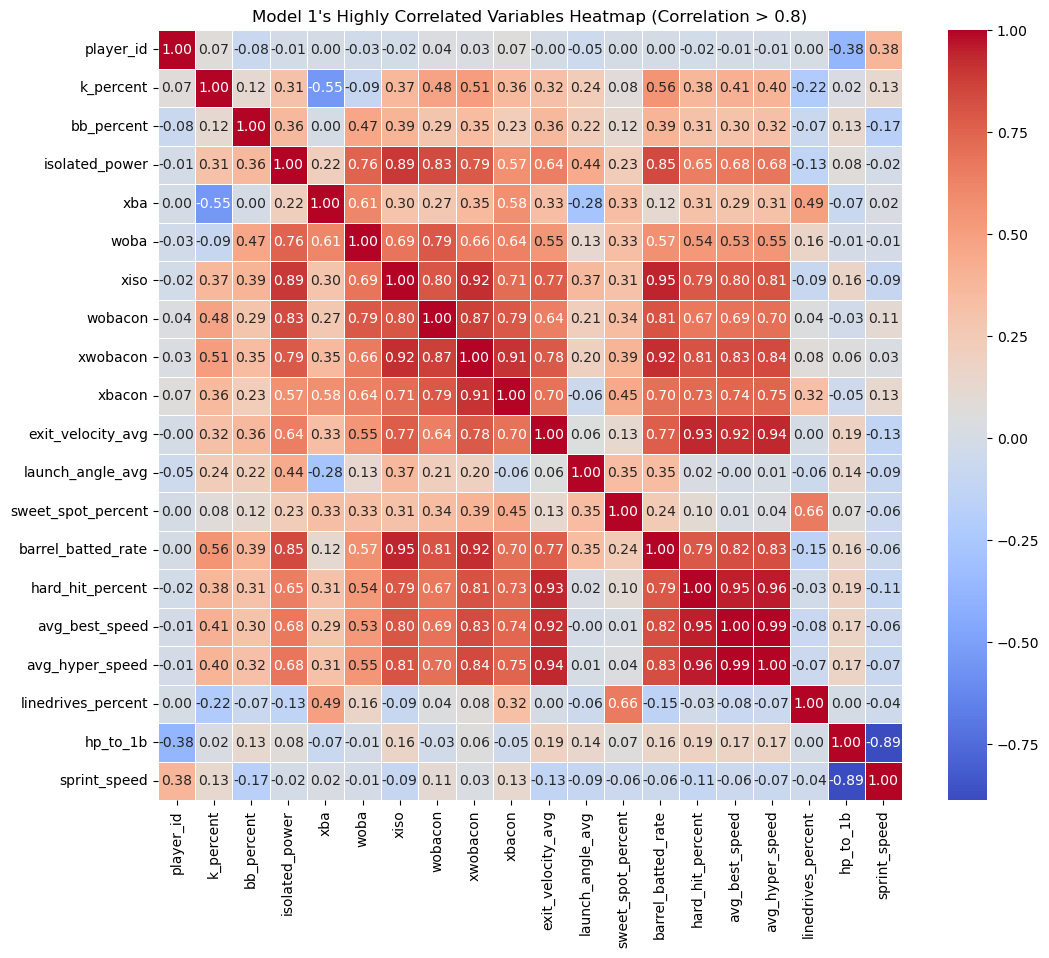

In [12]:
# Heatmap으로 시각화(scaling 전)
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_matrix1, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title("Model 1's Highly Correlated Variables Heatmap (Correlation > 0.8)")
plt.show()

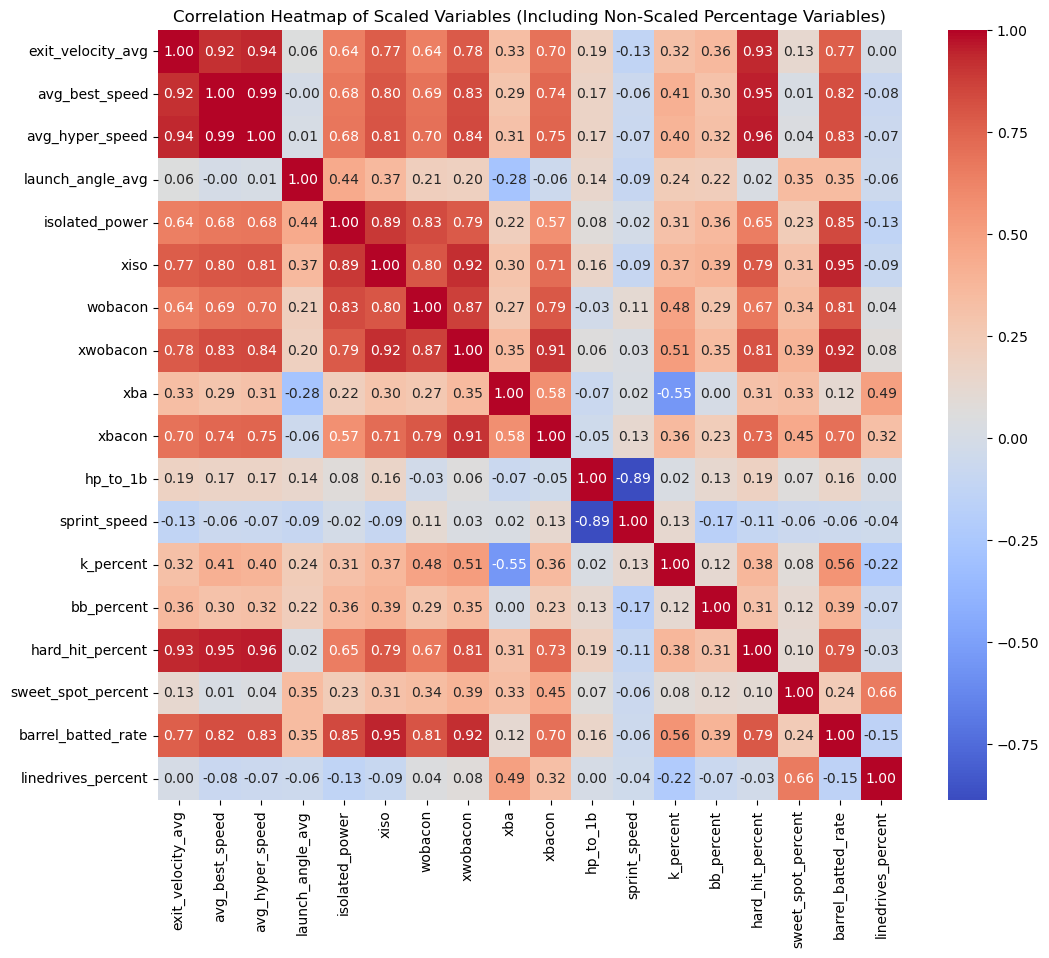

In [13]:
# 상관계수 계산(scaling 후)
correlation_matrix = model1_data[scaling_needed_vars + non_scaling_vars].corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Scaled Variables (Including Non-Scaled Percentage Variables)")
plt.show()